In [83]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

forex_data = yf.download('USDINR=X', start='2018-01-01', end='2022-05-31')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
# forex_data

mask=forex_data.isnull()
# print(mask)
forex_data[mask]=np.nan
forex_data=forex_data.fillna(method='bfill')
forex_data=forex_data.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

test=yf.download('USDINR=X', start='2022-06-01', end='2022-12-31')
# test
mask=test.isnull()
test[mask]=np.nan
test=test.fillna(method='bfill')
test=test.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
test




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-06-01,77.598999
2022-06-02,77.584099
2022-06-03,77.360497
2022-06-06,77.694199
2022-06-07,77.820999
...,...
2022-12-26,82.604103
2022-12-27,82.902901
2022-12-28,82.776100


In [85]:
test_data=list()
train_dat=forex_data.values.tolist()
test=test.values.tolist()

for t in test:
  ar=ARIMA(train_dat,order=(5,1,1))
  model=ar.fit()
  forcast=model.forecast()[0].tolist()

  test_data.append(forcast)
  train_dat.append(t)
print(test_data)


[77.65795168799957, 77.60225218080441, 77.58832992102133, 77.42147377460583, 77.64295532155607, 77.78101893760599, 77.67922227660092, 77.69927409422729, 77.8187761524019, 78.10751995193091, 78.13410055656499, 78.00971106327334, 77.93537989135508, 78.00027501636784, 77.97176464797657, 77.92792260275043, 78.08535625925587, 78.17288182199718, 78.14073947549784, 78.22681800503933, 78.40953718482308, 78.93176373366546, 78.89059633968569, 78.93842466213692, 78.97197914976947, 78.98776004030589, 79.28192050420093, 79.09499463747389, 79.18388050411866, 79.310988330444, 79.46305315400926, 79.45018950841238, 79.7389671459628, 79.85550825156622, 79.74966606848432, 79.97446232599765, 79.90738106504492, 79.98159708569999, 79.81685118097647, 79.88093165386942, 79.75378180033012, 79.82821756589263, 79.83303280465341, 79.62798724708011, 79.27997900146882, 79.04341137245649, 78.70826713146683, 79.01970979401639, 79.10269176838112, 79.30591494097554, 79.51352004376258, 79.58725182050149, 79.201201225111

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

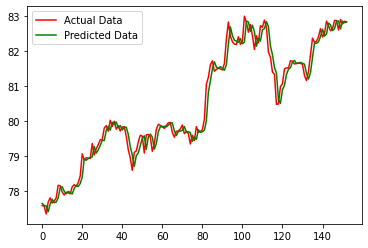

In [87]:
from sklearn.metrics import r2_score
plt.plot(test,color='red',label='Actual Data')
plt.plot(test_data,color='green', label='Predicted Data')
ax.set_xlabel('No. of Days')  # Add an x-label to the axes.
ax.set_ylabel('INR Value of 1 USD')  # Add a y-label to the axes.
ax.set_title("USD/INR : Actual vs Predicted using ARIMA Model")
plt.legend()
plt.show()

In [88]:
print("Mean Squared Error :",mean_squared_error(test,test_data))
print("Accuracy Score :" ,r2_score(test,test_data)*100)

Mean Squared Error : 0.0764074053399131
Accuracy Score : 97.05058394629619
